Methods used-

1. Mean for missing data.
2. Discretization with decision trees for continuous variables.
3. Weight of evidence method for categorical encoding.
4. Standard scaler for feature scaling.

Conclusion-

1. Logistic Regression overall predicts very well with the upscaling.
2. The Discretization with decision trees and WOE method for categorical encoding creates a monotonic relationship between features and target column.
3. Overall best model with comparatively less number of false positives.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Disease Prediction Data.csv')
dataset=dataset.drop('id',axis=1)

In [3]:
print(dataset.shape)
dataset.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [4]:
dataset['apoplexy'].value_counts()

No     4861
Yes     249
Name: apoplexy, dtype: int64

In [5]:
dataset.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
apoplexy             0.000000
dtype: float64

In [6]:
vars_with_na=[var for var in dataset.columns if dataset[var].isnull().mean()>0]
vars_with_na

['bmi']

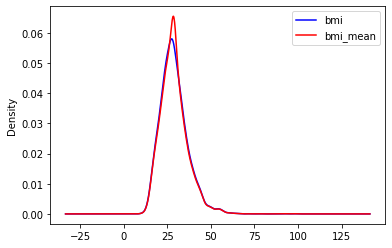

In [7]:
bmi_check=pd.DataFrame()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

bmi_check['bmi']=dataset['bmi']
bmi_check['bmi_mean']=imputer.fit_transform(dataset[['bmi']])

fig_median=plt.figure()
ax1=fig_median.add_subplot(111)

bmi_check['bmi'].plot(kind='kde', ax=ax1, color='blue')
bmi_check['bmi_mean'].plot(kind='kde', ax=ax1, color='red')


lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='best')

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
dataset['bmi']=imputer.fit_transform(dataset[['bmi']])

In [9]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


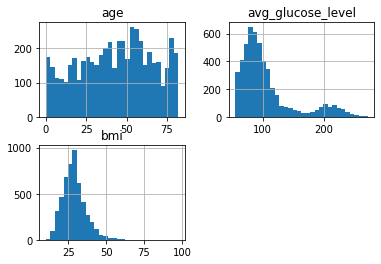

In [10]:
dataset[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

In [11]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [12]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 4)
tree_model.fit(x['age'].to_frame(), y)
x['age']=tree_model.predict_proba(x['age'].to_frame())


In [13]:
tree_model1 = DecisionTreeClassifier(max_depth = 4)
tree_model1.fit(x['avg_glucose_level'].to_frame(), y)
x['avg_glucose_level']=tree_model1.predict_proba(x['avg_glucose_level'].to_frame())

In [14]:
tree_model2 = DecisionTreeClassifier(max_depth = 4)
tree_model2.fit(x['bmi'].to_frame(), y)
x['bmi']=tree_model2.predict_proba(x['bmi'].to_frame())

In [15]:
dataset=pd.concat([x,y],axis=1)

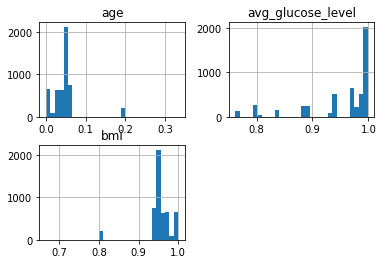

In [16]:
dataset[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

In [17]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,0.052383,No,Yes,Yes,Private,Urban,0.938462,0.947617,formerly smoked,Yes
1,Female,0.199005,No,No,Yes,Self-employed,Rural,0.938462,0.800995,never smoked,Yes
2,Male,0.052383,No,Yes,Yes,Private,Rural,0.761538,0.947617,never smoked,Yes
3,Female,0.052383,No,No,Yes,Private,Urban,0.967280,0.947617,smokes,Yes
4,Female,0.042071,Yes,No,Yes,Self-employed,Rural,0.799283,0.957929,never smoked,Yes


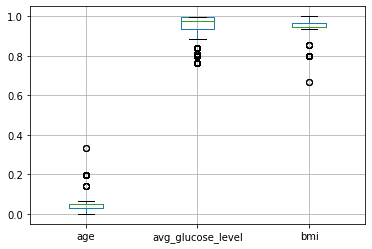

In [18]:
dataset[['age','avg_glucose_level','bmi']].boxplot()
plt.show()

In [19]:
dataset[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [20]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [21]:
print(pd.DataFrame(y))

        0
0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
...   ...
5105   No
5106   No
5107   No
5108   No
5109   No

[5110 rows x 1 columns]


In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [23]:
print(pd.DataFrame(y))

      0
0     1
1     1
2     1
3     1
4     1
...  ..
5105  0
5106  0
5107  0
5108  0
5109  0

[5110 rows x 1 columns]


In [24]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[:,[0,2,3,4,5,6,9]]=oe.fit_transform(x[:,[0,2,3,4,5,6,9]])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [26]:
print(pd.DataFrame(x_train))

        0         1    2    3    4    5    6         7         8    9
0     1.0  0.065508  0.0  0.0  1.0  3.0  0.0   0.96875  0.934492  3.0
1     1.0  0.042071  0.0  0.0  1.0  0.0  1.0   0.96875  0.957929  2.0
2     0.0  0.042071  0.0  0.0  1.0  2.0  0.0   0.99852  0.957929  2.0
3     1.0  0.065508  0.0  0.0  1.0  2.0  0.0  0.761538  0.934492  2.0
4     0.0       0.0  0.0  0.0  1.0  2.0  1.0  0.938462       1.0  2.0
...   ...       ...  ...  ...  ...  ...  ...       ...       ...  ...
4083  1.0  0.052383  0.0  0.0  1.0  2.0  1.0  0.977477  0.947617  2.0
4084  0.0  0.052383  0.0  0.0  1.0  2.0  0.0  0.977477  0.947617  0.0
4085  0.0  0.052383  0.0  0.0  1.0  2.0  0.0   0.99852  0.947617  2.0
4086  0.0       0.0  0.0  0.0  1.0  2.0  0.0  0.977477       1.0  3.0
4087  0.0  0.052383  0.0  0.0  1.0  2.0  0.0  0.808511  0.947617  0.0

[4088 rows x 10 columns]


In [27]:
print(pd.DataFrame(y_train))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
4083  0
4084  0
4085  0
4086  0
4087  1

[4088 rows x 1 columns]


In [28]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [29]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [30]:
print(pd.DataFrame(y_train))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
7793  1
7794  1
7795  1
7796  1
7797  1

[7798 rows x 1 columns]


In [31]:
print(pd.DataFrame(y_test))

      0
0     0
1     0
2     0
3     0
4     0
...  ..
1017  0
1018  0
1019  0
1020  0
1021  0

[1022 rows x 1 columns]


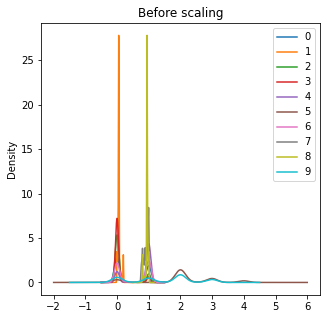

In [32]:
fig,ax5=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train).plot(kind='kde', ax=ax5)
ax5.set_title('Before scaling')
lines5, labels5 = ax5.get_legend_handles_labels()
ax5.legend(lines5, labels5, loc='best')

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

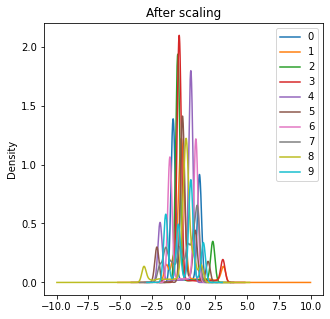

In [34]:
fig,ax6=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train_scaled).plot(kind='kde', ax=ax6)
ax6.set_title('After scaling')
lines6, labels6 = ax6.get_legend_handles_labels()
ax6.legend(lines6, labels6, loc='best')

In [35]:
print(pd.DataFrame(x_train_scaled))

             0         1         2         3         4         5         6  \
0     1.241991  0.097571 -0.466794 -0.355992  0.561039  0.909850 -1.087619   
1     1.241991 -0.435506 -0.466794 -0.355992  0.561039 -2.107426  0.957967   
2    -0.832894 -0.435506 -0.466794 -0.355992  0.561039 -0.095909 -1.087619   
3     1.241991  0.097571 -0.466794 -0.355992  0.561039 -0.095909 -1.087619   
4    -0.832894 -1.392427 -0.466794 -0.355992  0.561039 -0.095909  0.957967   
...        ...       ...       ...       ...       ...       ...       ...   
7793  1.241991 -0.200956 -0.466794  3.086142  0.561039  0.020262  0.957967   
7794 -0.832894 -0.112175 -0.466794 -0.355992  0.561039 -2.107426 -1.087619   
7795 -0.832894  3.133997 -0.466794 -0.355992  0.561039  0.909850  0.311334   
7796 -0.464486 -0.147951 -0.466794 -0.355992 -1.863350  0.909850  0.957967   
7797  1.241991  0.097571 -0.466794 -0.355992  0.561039 -0.095909  0.957967   

             7         8         9  
0     0.737970 -0.097571  

In [36]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train_scaled,y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred=classifier.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[759 203]
 [ 11  49]]


0.7906066536203522

In [38]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [39]:
print(pd.DataFrame(y_pred).apply(pd.value_counts))

     0
0  770
1  252


In [40]:
print(pd.DataFrame(y_test).apply(pd.value_counts))

     0
0  962
1   60


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score,classification_report
accuracies = cross_val_score(estimator = classifier,X=x_train_scaled,y=y_train,cv=10)
Precision = precision_score(y_true=y_test,y_pred=y_pred)
f1_score = f1_score(y_true=y_test,y_pred=y_pred)
recall_score = recall_score(y_true=y_test,y_pred=y_pred)
roc_auc_score = roc_auc_score(y_true=y_test,y_score=y_pred)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Precision: {:.2f}%".format(Precision.mean()*100))
print("f1_score: {:.2f}".format(f1_score))
print("recall_score: {:.2f}".format(recall_score))
print("roc_auc_score: {:.2f}%".format(roc_auc_score.mean()*100))
print(classification_report(y_true=y_test,y_pred=y_pred))

Accuracy: 77.48%
Standard Deviation: 1.40%
Precision: 19.44%
f1_score: 0.31
recall_score: 0.82
roc_auc_score: 80.28%
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       962
           1       0.19      0.82      0.31        60

    accuracy                           0.79      1022
   macro avg       0.59      0.80      0.60      1022
weighted avg       0.94      0.79      0.84      1022



In [42]:
from sklearn.model_selection import GridSearchCV
parameters=[{'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'random_state':[0,1,2,3,4,5],'max_iter':[100,200,300,400,500],
            'C':[1,2,3,4,5]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search.fit(x_train_scaled,y_train)
best_accuracy=grid_search.best_score_
best_parameters=grid_search.best_params_
print("Best Accuracy: {:.2f}%".format(best_accuracy*100))
print("Best Accuracy: ",best_parameters)

Best Accuracy: 77.48%
Best Accuracy:  {'C': 1, 'max_iter': 100, 'random_state': 0, 'solver': 'newton-cg'}


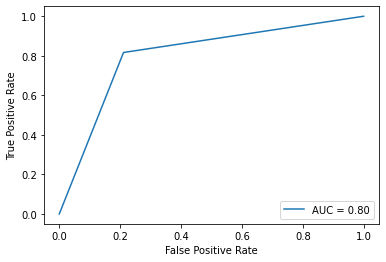

In [43]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred, pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()
plt.show()